In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py 

In [2]:

with h5py.File('results_TDupgrade2.hdf5', 'r') as f:
    
    exp_data = f['exp_data'][:]
    gammas_data = f['gammas_data'][:]
    gammas_names = f['gammas_names'][:].astype(str)
    exp_names = f['exp_names'][:].astype(str)
    recProbExp = f['recProbExp'][:]

In [3]:
print(exp_names)

['Tnw' 'Tw' 'O_den' 'pressure' 'current' 'FluxIon' 'EavgMB']


In [4]:
Tnw_vec = exp_data[:, 0]
Tw_vec = exp_data[:, 1]
pressure_vec = exp_data[:, 3]
current_vec = exp_data[:, 4]
gammas_total_vec = np.sum(gammas_data, axis=1)
gammas_exp_vec = recProbExp


pair:  [257.57175514 259.71891904 262.06410587 267.09906212 271.60300044
 276.18416864 259.29651911 264.09946957 268.46158067 271.50117368
 276.41384452 282.2238784  290.28079366 303.3456111  315.12752448]
pair:  [282.57175514 284.71891904 287.06410587 288.58711704 292.09906212
 296.60300044 301.18416864 309.85776028 284.29651911 289.09946957
 293.46158067 296.50117368 301.41384452 307.2238784  315.28079366
 328.3456111  340.12752448]
pair:  [302.57175514 304.71891904 307.06410587 308.58711704 312.09906212
 316.60300044 321.18416864 329.85776028 304.29651911 309.09946957
 313.46158067 316.50117368 321.41384452 327.2238784  335.28079366
 348.3456111  360.12752448]


pair:  [327.57175514 329.71891904 332.06410587 333.58711704 337.09906212
 341.60300044 346.18416864 354.85776028 329.29651911 334.09946957
 338.46158067 341.50117368 346.41384452 352.2238784  360.28079366
 373.3456111  385.12752448]


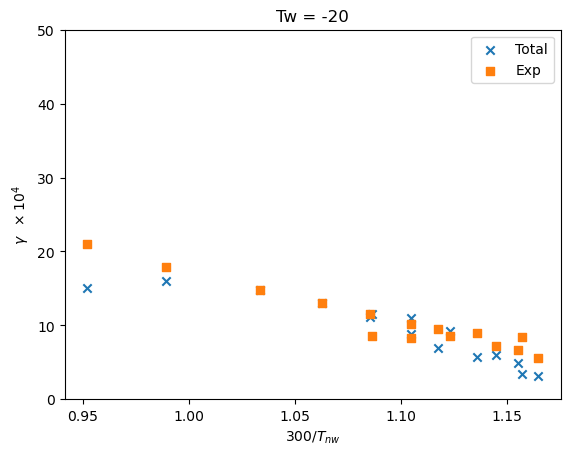

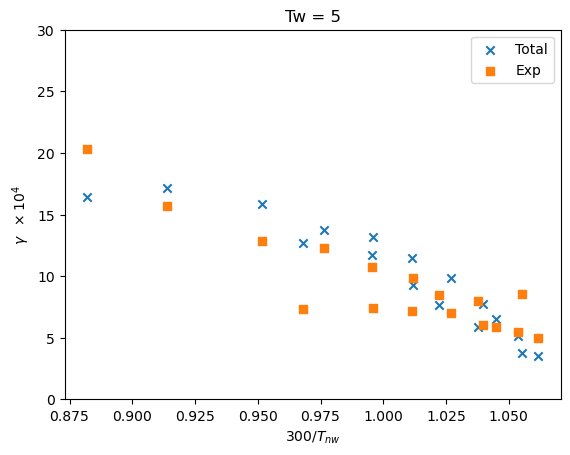

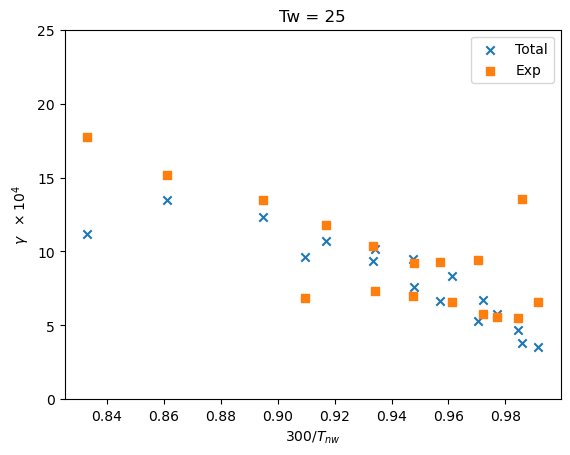

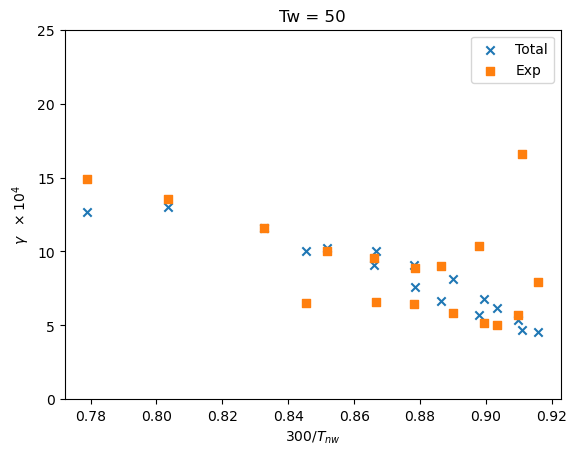

In [8]:
Tw_unique_values = np.unique(Tw_vec)


sum_value = 0

for value in Tw_unique_values:
    Tw = value
    indices = np.where((Tw_vec == Tw))[0]
    gammas_total = gammas_total_vec[indices]
    gammas_total_comp = gammas_data[indices, :]
    
    sum_value += np.sum((gammas_total - gammas_exp_vec[indices])**2)
    
    gammas_exp = gammas_exp_vec[indices]
    Tnw = Tnw_vec[indices]
    print("pair: ", Tnw)
    x_vec = 300*np.reciprocal(Tnw)
    
    pressure = pressure_vec[indices]
    # plt.figure()
    fig, ax = plt.subplots()
    ax.scatter(x_vec, gammas_total*1e4, label='Total', marker='x')
    ax.scatter(x_vec, gammas_exp*1e4, label='Exp', marker='s')
    
    
    if Tw-273.15 == -20:
        ax.set_yticks(range(0, 51, 10))
        filename = 'Tw-20UpgMod.png'
    if Tw-273.15 == 5:
        ax.set_yticks(range(0, 31, 5))
        filename = 'Tw5UpgMod.png'
    if Tw-273.15 == 25:
        ax.set_yticks(range(0, 26, 5))
        filename = 'Tw25UpgMod.png'
    if Tw-273.15 == 50:
        ax.set_yticks(range(0, 26, 5))
        filename = 'Tw50UpgMod.png'
    
    # for i in range(gammas_data.shape[1]):
    #     plt.scatter(x_vec, gammas_total_comp[:, i], label=gammas_names[i], marker='.')
    
    # plt.grid()
    plt.xlabel(r"$300/T_{nw}$")
    plt.ylabel(r"$\gamma ~~ \times 10^4$")
    plt.title('Tw = %d' % (Tw-273.15))
    # plt.yscale('log')
    plt.legend()
    # plt.show()
    plt.savefig("figures/"+filename)

In [9]:
print(sum_value)

6.9675009875528805e-06


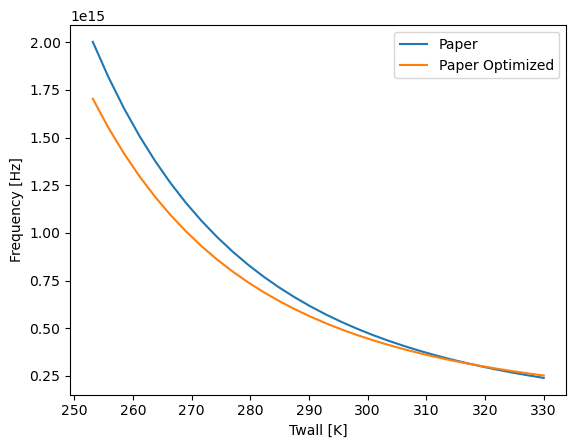

In [16]:

R = 0.00831442
func_freq = lambda Tw: 1e15 * (0.01634 + 1.67e-4 * np.exp(19.75 /(R * Tw)))
func_freq2 = lambda Tw: 1e15 * (0.06815468 + 0.00013756 * np.exp(19.75 /(R * Tw)))

Twall_vec = np.linspace(253.15, 330, 30)
func_freq_vec = func_freq(Twall_vec)
func_freq_vec2 = func_freq2(Twall_vec)

plt.plot(Twall_vec, func_freq_vec, label='Paper')
plt.plot(Twall_vec, func_freq_vec2, label='Paper Optimized')
plt.xlabel(xlabel='Twall [K]')
plt.ylabel(ylabel='Frequency [Hz]')
plt.legend()
plt.savefig('figures/freq.png')
